In [1]:
#IMPORTACION DE LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#lectura de datasets
samsung_df = pd.read_csv('SSNG.csv', delimiter=',')
apple_df = pd.read_csv('AAPL.csv', delimiter=',')
won_to_usd_00_17_df = pd.read_csv('KRW_TO_USD_2000-2017.csv', delimiter=',')
won_to_usd_04_22_df = pd.read_csv('KRW_TO_USD_2004-2022.csv', delimiter=',')
#seleccion de las columnas que nos interesa
won_to_usd_04_22_df = won_to_usd_04_22_df[['Date', 'KRW=X']]

In [3]:
#eliminar filas con valores nulos
samsung_df = samsung_df.dropna()
apple_df = apple_df.dropna()
won_to_usd_00_17_df = won_to_usd_00_17_df.dropna()
won_to_usd_04_22_df = won_to_usd_04_22_df.dropna()
#eliminar filas con valores .
won_to_usd_00_17_df = won_to_usd_00_17_df[won_to_usd_00_17_df['DEXKOUS'] != '.']
won_to_usd_04_22_df = won_to_usd_04_22_df[won_to_usd_04_22_df['KRW=X'] != '.']

In [4]:
#Darle formato de fecha a las columnas con fechas
samsung_df['Date'] = pd.to_datetime(samsung_df['Date'])
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
won_to_usd_00_17_df['DATE'] = pd.to_datetime(won_to_usd_00_17_df['DATE'])
won_to_usd_04_22_df['Date'] = pd.to_datetime(won_to_usd_04_22_df['Date'])
# Modificar la forma en que vamos a ver la fecha
samsung_df['Date'] = samsung_df['Date'].dt.strftime('%Y-%m-%d')
apple_df['Date'] = apple_df['Date'].dt.strftime('%Y-%m-%d')
won_to_usd_00_17_df['DATE'] = won_to_usd_00_17_df['DATE'].dt.strftime('%Y-%m-%d')
won_to_usd_04_22_df['Date'] = won_to_usd_04_22_df['Date'].dt.strftime('%Y-%m-%d')

In [5]:
#renombrado de columnas
samsung_df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'}, inplace=True)
apple_df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'}, inplace=True)
won_to_usd_00_17_df.rename(columns={'DATE': 'date', 'DEXKOUS': 'dollar'}, inplace=True)
won_to_usd_04_22_df.rename(columns={'Date': 'date', 'KRW=X': 'dollar'}, inplace=True)

##### Ajustando valores cambiarios (USD-KRW)

1. Unimos los datasets de los historicos cambiarios entre dolar y won.
2. Pulimos la data combinada para que no haya repetidos y solo quede un rango desde el 2000 hasta el 2022.
3. Creamos una columna adicional en la tabla samsung para que coincidan las fechas de las acciones con las fechas de los valores cambiarios exactos.
4. Limpiamos las columnas vacías o nulas que queden de la tabla samsung.

In [6]:
#combinar datasets de valores de conversion entre dolar y won coreano
combined_dollar_values = pd.concat([won_to_usd_00_17_df, won_to_usd_04_22_df])
combined_dollar_values = combined_dollar_values.drop_duplicates(subset='date')

#agregar columna de conversion de won a dolar en la tabla de samsung
samsung_df['usd_to_won'] = samsung_df['date'].map(combined_dollar_values.set_index('date')['dollar'])

#filtrar filas con volumen 0 y eliminar filas con valores nulos
samsung_df = samsung_df[samsung_df['volume'] != 0]
samsung_df = samsung_df.dropna()

In [7]:
#Crear columnas de año para cada tabla
samsung_df['year'] = pd.DatetimeIndex(samsung_df['date']).year
apple_df['year'] = pd.DatetimeIndex(apple_df['date']).year

##### Pasando a USD todas las columnas con valor de KRW

In [8]:
samsung_df['open'] = samsung_df.apply(lambda x: float(x['open']) / float(x['usd_to_won']), axis=1)
samsung_df['high'] = samsung_df.apply(lambda x: float(x['high']) / float(x['usd_to_won']), axis=1)
samsung_df['low'] = samsung_df.apply(lambda x: float(x['low']) / float(x['usd_to_won']), axis=1)
samsung_df['close'] = samsung_df.apply(lambda x: float(x['close']) / float(x['usd_to_won']), axis=1)
samsung_df['adj_close'] = samsung_df.apply(lambda x: float(x['adj_close']) / float(x['usd_to_won']), axis=1)

##### Delimitando el rango de las acciones de Apple para que coincida la evaluación con Samsung

In [9]:
START = samsung_df['date'].min()
END = samsung_df['date'].max()
apple_df = apple_df[(apple_df['date'] >= START) & (apple_df['date'] <= END)]

### VISUALIZACION DE TABLAS

In [10]:
print(apple_df)

             date        open        high         low       close   adj_close  \
4836   2000-02-01    0.928571    0.937500    0.892857    0.895089    0.758749   
4837   2000-02-02    0.899554    0.911830    0.866071    0.882254    0.747869   
4838   2000-02-03    0.895647    0.930804    0.895089    0.922433    0.781928   
4839   2000-02-04    0.928013    0.982143    0.925223    0.964286    0.817406   
4840   2000-02-07    0.964286    1.020089    0.945871    1.018415    0.863290   
...           ...         ...         ...         ...         ...         ...   
10445  2022-05-17  148.860001  149.770004  146.679993  149.240005  147.959152   
10446  2022-05-18  146.850006  147.360001  139.899994  140.820007  139.611404   
10447  2022-05-19  139.880005  141.660004  136.600006  137.350006  136.171204   
10448  2022-05-20  139.089996  140.699997  132.610001  137.589996  136.409119   
10449  2022-05-23  137.789993  143.259995  137.649994  143.110001  141.881744   

          volume  year  
48

In [11]:
print(samsung_df)

            date       open       high        low      close  adj_close  \
20    2000-02-01   4.968944   5.039929   4.667258   4.720497   3.593865   
21    2000-02-02   4.615385   4.748011   4.518126   4.641910   3.534034   
22    2000-02-03   4.643963   4.829721   4.396285   4.537815   3.454784   
24    2000-02-07   4.550283   4.718484   4.461756   4.638810   3.531676   
25    2000-02-08   4.727756   4.851704   4.701195   4.807437   3.660056   
...          ...        ...        ...        ...        ...        ...   
5616  2022-05-17  52.037348  53.053092  52.037348  52.818690  52.818690   
5617  2022-05-18  53.921336  54.237128  53.368702  53.763441  53.763441   
5618  2022-05-19  52.133147  52.995500  52.133147  52.917104  52.917104   
5619  2022-05-20  53.658344  54.133196  53.579201  53.816628  53.816628   
5620  2022-05-23  54.036648  54.036648  53.094148  53.329773  53.329773   

         volume usd_to_won  year  
20     71470000    1127.00  2000  
21     64105000    1131.00  2

### GRAFICAS DE ANALISIS

1. EVOLUCIÓN HISTORICA DEL PRECIO

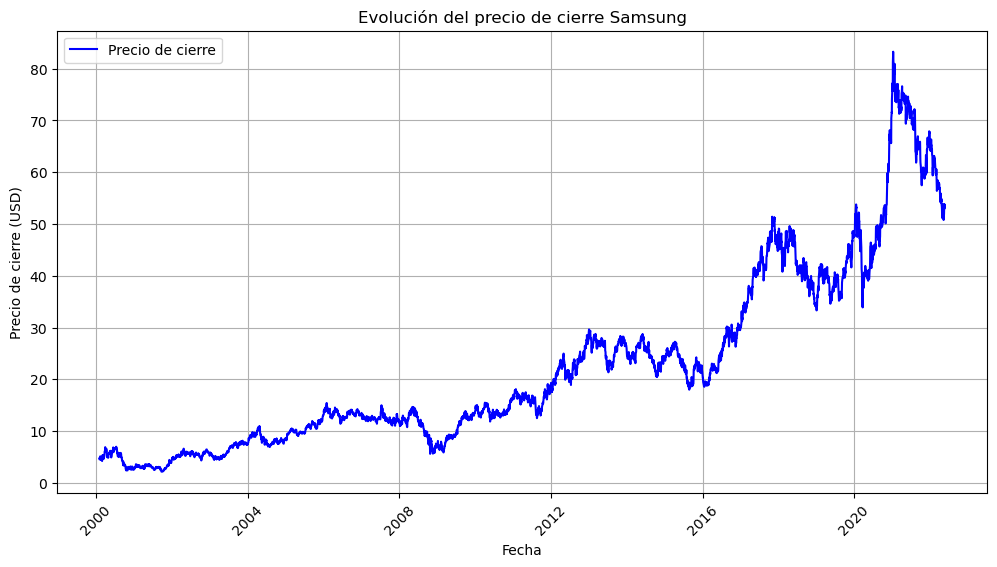

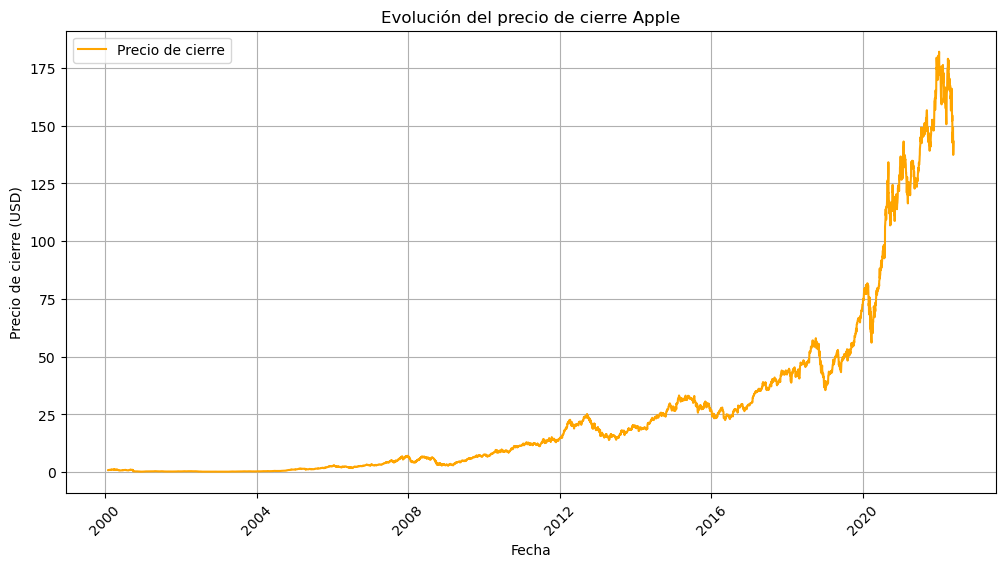

In [14]:
# Función para mostrar evolución precios de cierre de la acción por empresa
def graph_closing_price(df, date_column='date', price_column='close', title='', xlabel='Fecha', ylabel='Precio de cierre (USD)', scale_color='blue'):

    # Convertir la columna de fecha a formato datetime
    df[date_column] = pd.to_datetime(df[date_column], format='%Y-%m-%d')

    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(df[date_column], df[price_column], label='Precio de cierre', color=scale_color)

    # Personalizar el gráfico
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()

graph_closing_price(samsung_df, title='Evolución del precio de cierre Samsung')
graph_closing_price(apple_df, title='Evolución del precio de cierre Apple', scale_color='orange')

    1.1 COMPARACIÓN DE LA EVOLUCIÓN HISTÓRICA DEL PRECIO ENTRE SAMSUNG VS APPLE

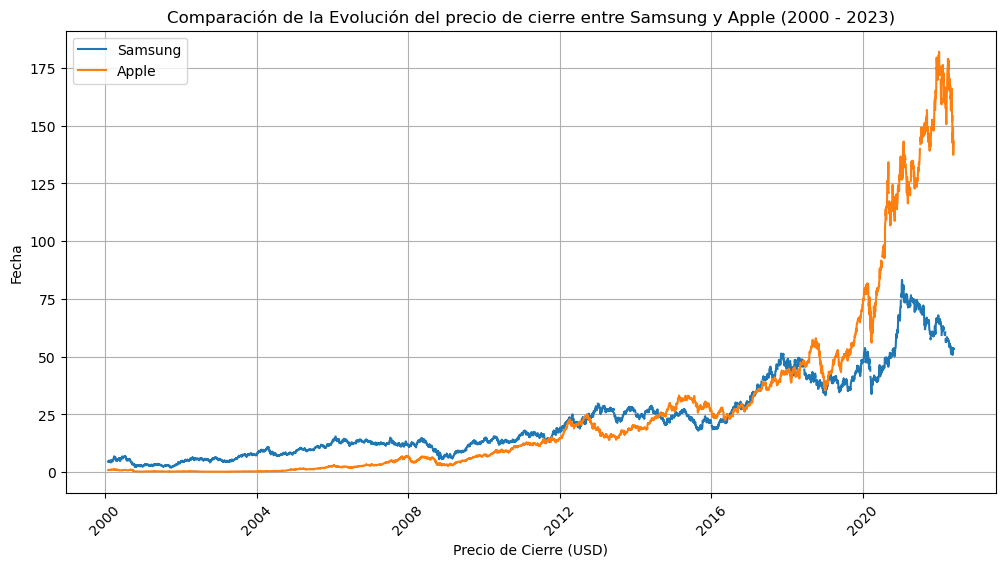

In [16]:
samsung_df['company'] = 'Samsung'
apple_df['company'] = 'Apple'

# Combinar los DataFrames
df_combinado = pd.concat([samsung_df, apple_df], ignore_index=True)

# Pivotar los datos
df_pivot = df_combinado.pivot(index='date', columns='company', values='close')

plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['Samsung'], label='Samsung')
plt.plot(df_pivot.index, df_pivot['Apple'], label='Apple')

# Personalizar el gráfico
plt.title('Comparación de la Evolución del precio de cierre entre Samsung y Apple (2000 - 2023)')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Fecha')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()